In [113]:
import numpy as np
import pandas as pd

In [160]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [115]:
data=pd.read_csv("C:/Users/gordee-ext/OneDrive - Louis Dreyfus Company/Desktop/Netology/Моудль 4/Задание 1/titanic.csv")

In [116]:
data.head(1)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.25,NaN,S


In [117]:
#Дропнем текстовые неважные фичи
data_fix=data.drop(['Lname','Name','Ticket','Cabin','Embarked'], axis=1)

In [118]:
#Заменим пол на числовые значения
data_fix['Sex']=data_fix['Sex'].map({'male': 1, 'female': 0})

In [119]:
#Найдем пустые значения
data_fix.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            30
SibSp           0
Parch           0
Fare            0
dtype: int64

In [120]:
#Заменим пропущенный возраст на среднее значение
#data_fix['Age'].fillna(data_fix['Age'].mean())
data_fix= data_fix.dropna(subset=['Age'])
data_fix.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [121]:
x_train, x_test, y_train, y_test = train_test_split(data_fix.drop('Survived', axis = 1), data_fix['Survived'],\
                                                          test_size=0.3, shuffle=True, random_state=42)

In [122]:
clf = DecisionTreeClassifier()

In [123]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [124]:
y=clf.predict(x_test)

In [125]:
y_proba=clf.predict_proba(x_test)

In [126]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [127]:
def test_clf(clf, X, y, cmap=None, fit_clf=False):
    xx,yy = get_grid(X.values)
    if fit_clf:
        clf.fit(X, y)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, predicted, cmap=cmap or 'spring')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, cmap=cmap or 'spring')
    if fit_clf:
        return clf

In [170]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [171]:
#get_tree_dot_view(clf, list(x_train.columns), y_train)

In [156]:
#Кросс валидация по нескольким фичам
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [166]:
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=6)
clf.fit(x_train, y_train)

C:\Users\gordee-ext\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [167]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'split5_test_score',
 'split5_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

''

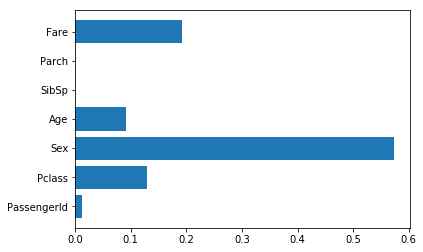

In [169]:
#Оценка важности фичей
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(x_train.columns)),x_train.columns)
''               

In [ ]:
#Самые важные фичи: Sex, Fare, Pclass